# Data cleaning of the exchange rate raw data from the Central Bank of Nigeria (CBN)

# Import relevant libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set_theme(style="ticks")


In [2]:
df = pd.read_csv("exchange07062021.csv", index_col=False)

#Data source - Central Bank of Nigeria - https://www.cbn.gov.ng/rates/ExchRateByCurrency.asp 

In [17]:
#Let's take a look at the dataset.

In [3]:
df.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,6/4/2021,US DOLLAR,2021,June,409.1800,409.6800,410.1800
1,6/4/2021,POUNDS STERLING,2021,June,578.5396,579.2466,579.9535
2,6/4/2021,EURO,2021,June,495.9262,496.5322,497.1382
3,6/4/2021,SWISS FRANC,2021,June,452.5827,453.1357,453.6888
4,6/4/2021,YEN,2021,June,3.7161,3.7206,3.7252


In [4]:
df.dtypes #checks the type of data in each column

Rate Date        object
Currency         object
Rate Year         int64
Rate Month       object
Buying Rate     float64
Central Rate    float64
Selling Rate    float64
dtype: object

In [5]:
#Let's replace the space between the column headers for ease of analysis(e.g. calling df attributes)

In [6]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [7]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate,central_rate,selling_rate
0,6/4/2021,US DOLLAR,2021,June,409.1800,409.6800,410.1800
1,6/4/2021,POUNDS STERLING,2021,June,578.5396,579.2466,579.9535
2,6/4/2021,EURO,2021,June,495.9262,496.5322,497.1382
3,6/4/2021,SWISS FRANC,2021,June,452.5827,453.1357,453.6888
4,6/4/2021,YEN,2021,June,3.7161,3.7206,3.7252


In [8]:
#Notice the change in the column headers

In [21]:
#let's check other info (e.g. null values, number of entries)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46459 entries, 0 to 46458
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rate_date     46459 non-null  object 
 1   currency      46459 non-null  object 
 2   rate_year     46459 non-null  int64  
 3   rate_month    46459 non-null  object 
 4   buying_rate   46459 non-null  float64
 5   central_rate  46459 non-null  float64
 6   selling_rate  46459 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.5+ MB


In [11]:
#Let's remove unwanted columns

In [12]:
df.drop(["central_rate", "selling_rate"], axis=1, inplace=True)

In [13]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate
0,6/4/2021,US DOLLAR,2021,June,409.1800
1,6/4/2021,POUNDS STERLING,2021,June,578.5396
2,6/4/2021,EURO,2021,June,495.9262
3,6/4/2021,SWISS FRANC,2021,June,452.5827
4,6/4/2021,YEN,2021,June,3.7161


In [14]:
#Let's convert the "rate_date" to datetime format 

In [15]:
df["rate_date"] = pd.to_datetime(df.rate_date) 

In [16]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate
0,2021-06-04,US DOLLAR,2021,June,409.1800
1,2021-06-04,POUNDS STERLING,2021,June,578.5396
2,2021-06-04,EURO,2021,June,495.9262
3,2021-06-04,SWISS FRANC,2021,June,452.5827
4,2021-06-04,YEN,2021,June,3.7161


# We'll only need the Pounds to Naira exchange for this case study, let's filter it

In [18]:
df = df[df["currency"]=="POUNDS STERLING"]

In [19]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate
1,2021-06-04,POUNDS STERLING,2021,June,578.5396
13,2021-06-03,POUNDS STERLING,2021,June,580.1638
25,2021-06-02,POUNDS STERLING,2021,June,578.7189
37,2021-06-01,POUNDS STERLING,2021,June,579.6757
49,2021-05-31,POUNDS STERLING,2021,May,580.1256


In [20]:
len(df)

4761

In [22]:
#this has reduced the records from 46,459 to 4,761.

In [23]:
#In order to get some descriptive statistics (e.g. mean, median, minimum, maximum) for the data.
#we'll use the "describe" function shown below

In [24]:
df.describe()

,rate_year,buying_rate
count,4761.000000,4.761000e+03
mean,2011.190716,7.538170e+02
std,5.623346,3.245857e+04
min,2001.000000,1.197060e+02
25%,2006.000000,2.321972e+02
50%,2011.000000,2.464969e+02
75%,2016.000000,3.702710e+02
max,2021.000000,2.239917e+06


In [25]:
#Note the significantly large max value for the "buying_rate". This indicates an error. 

In [26]:
#Let's find it and remove it

In [27]:
df[(df["buying_rate"]> 2000000 ) ]

,rate_date,currency,rate_year,rate_month,buying_rate
43680,2003-10-30,POUNDS STERLING,2003,October,2239917.0


In [28]:
#Let's remove/drop it

In [29]:
df = df.drop(df[(df["buying_rate"]> 2000000 )].index)

In [30]:
#This analysis took place in 2021, hence, there's incomplete 2021 data.
#As such, it's excluded from the analysis limiting it to 2001 - 2020. 

In [31]:
df = df[df["rate_year"]!= 2021]

In [32]:
len(df)

4665

In [33]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate
144,2021-05-07,POUNDS STERLING,2020,May,526.7721
1172,2020-12-31,POUNDS STERLING,2020,December,517.3350
1184,2020-12-30,POUNDS STERLING,2020,December,515.8948
1196,2020-12-29,POUNDS STERLING,2020,December,511.8395
1208,2020-12-24,POUNDS STERLING,2020,December,514.9852


In [34]:
#looking at the revised df, it appears that the top row should be in 2021, therefore, let's remove it.

In [35]:
df.drop(df.index[[0]], inplace=True)

# Initial visualisation

<AxesSubplot:xlabel='rate_date', ylabel='buying_rate'>

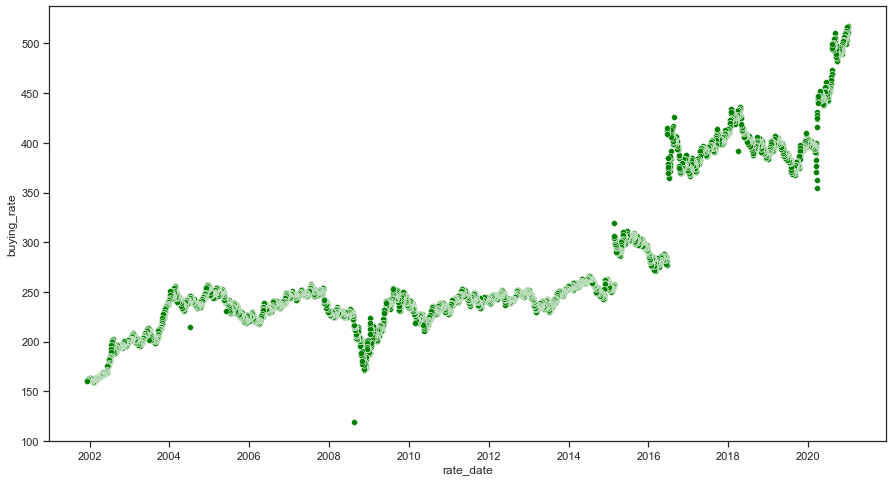

In [36]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(data=df, x="rate_date", y="buying_rate", color="green")

In [37]:
#From the data above, it appears that there are outliers in 2004 and 2008

In [38]:
#First, let's find and remove the outlier data in 2004

In [39]:
df[(df["rate_year"] == 2004) & (df["buying_rate"]< 230)] 

,rate_date,currency,rate_year,rate_month,buying_rate
42579,2004-07-06,POUNDS STERLING,2004,July,214.8455


In [40]:
df = df.drop(df[(df["rate_year"] == 2004) & (df["buying_rate"]< 230)].index)

<AxesSubplot:xlabel='rate_date', ylabel='buying_rate'>

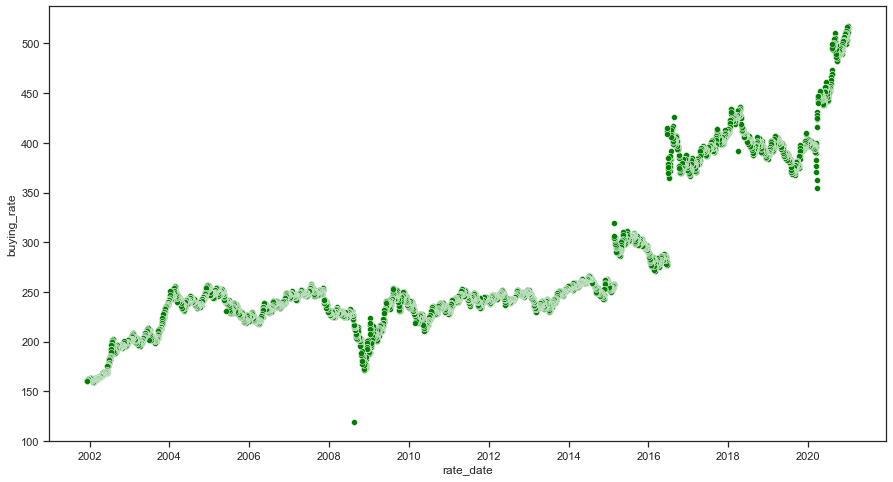

In [41]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(data=df, x="rate_date", y="buying_rate", color="green")

In [42]:
#Now, let's find and remove the outlier data in 2008

In [43]:
df[(df["rate_year"] == 2008) & (df["buying_rate"]< 150)] 

,rate_date,currency,rate_year,rate_month,buying_rate
34740,2008-08-12,POUNDS STERLING,2008,August,119.706


In [44]:
df = df.drop(df[(df["rate_year"] == 2008) & (df["buying_rate"]< 150)].index)

<AxesSubplot:xlabel='rate_date', ylabel='buying_rate'>

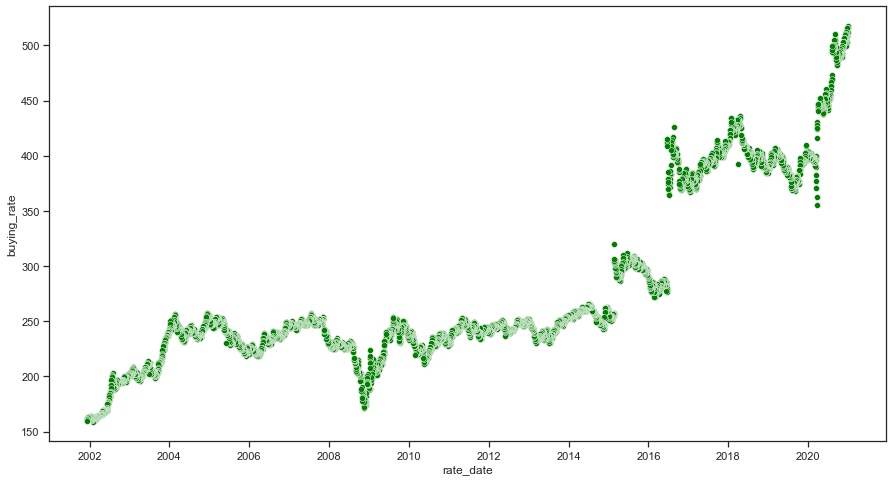

In [45]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(data=df, x="rate_date", y="buying_rate", color="green")

In [46]:
#The outlier points are gone

# Let's get the average rate for each month across the years

In [47]:
df.groupby("rate_month").mean()["buying_rate"].sort_values(ascending=True)

rate_month
August       241.767150
August\t     242.634600
8            245.249600
January      270.097545
February     271.385214
March        271.920624
April        273.929981
May          275.433197
June         276.943365
July         280.385778
October      282.380330
December     282.708693
September    282.872453
August       286.238122
November     286.348734
Name: buying_rate, dtype: float64

In [48]:
#note the typographical errors

# "August\t" should be "August"
# "8" should be "August"

In [49]:
#Let's find and replace them

In [50]:
df["rate_month"].replace({"8":"August", "August\t":"August", "August ":"August"}, inplace=True)

In [51]:
df.groupby("rate_month").mean()["buying_rate"].sort_values(ascending=True)

rate_month
January      270.097545
February     271.385214
March        271.920624
April        273.929981
May          275.433197
June         276.943365
July         280.385778
October      282.380330
December     282.708693
September    282.872453
August       285.807516
November     286.348734
Name: buying_rate, dtype: float64

In [52]:
#It comes out better now

# Let's get the average rate per year

In [53]:
df.groupby("rate_year").mean()

,buying_rate
rate_year,
2001,161.940985
2002,180.506688
2003,209.806118
2004,242.742668
2005,237.747661
2006,233.030476
2007,247.438658
2008,216.259357
2009,229.366047


# Let's visualise it

<AxesSubplot:xlabel='rate_year', ylabel='buying_rate'>

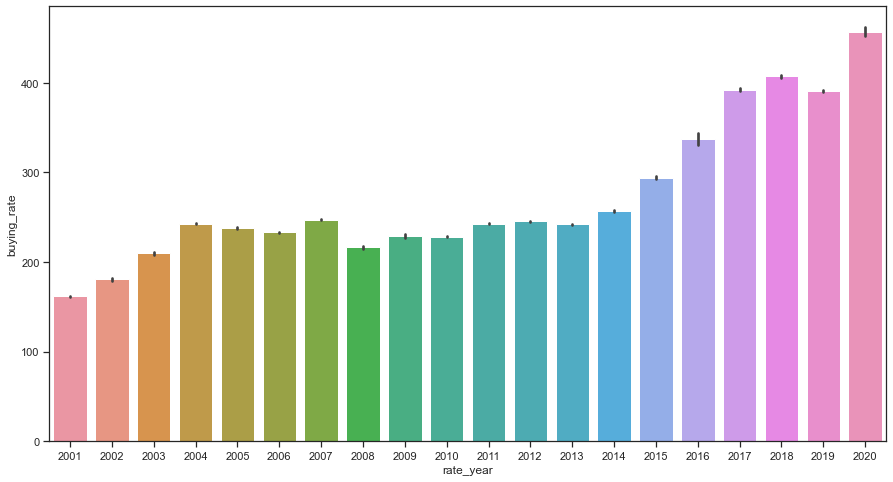

In [54]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=df, x="rate_year", y="buying_rate")

In [55]:
#The results above show that the values general increased from 2001 to 2020.

#However, the average rate dropped from:
# 2004 to 2005
# 2005 to 2006
# 2007 to 2008 
# 2009 to 2010 
# 2012 to 2013
# 2018 to 2019 

# Let's save the average rate per year into a csv file for subsequent analysis

In [56]:
average_year = df.groupby("rate_year").mean()

In [57]:
average_year.to_csv("average_year_rate_GBP_to_NGN_2001-2020.csv")

In [58]:
#   category_orders= {"December", "November", "October", "September", "August", "July", 
#"June", "May", "April", "March", "February", "January"})

# Let's visualise the annual rate across 20 years using a box plot

In [59]:
#A benefit of the box plot entails visualising their variation & quartiles (e.g. median, lower and upper quartiles)

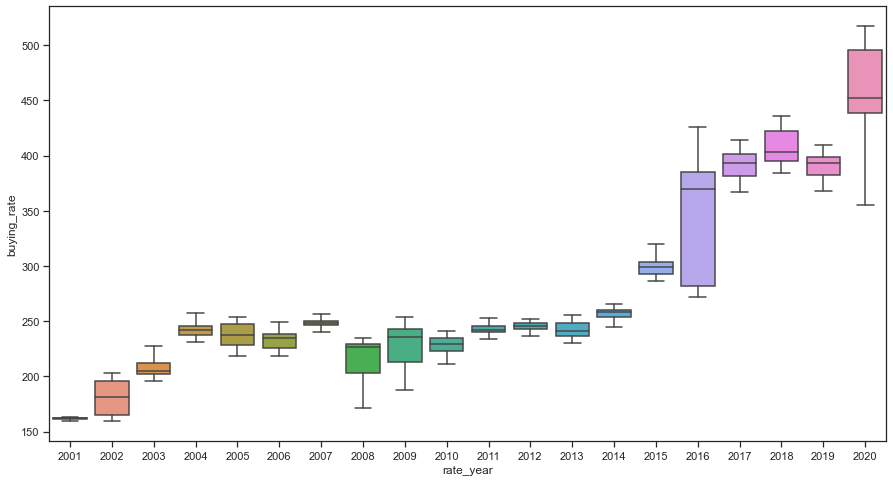

In [60]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(x="rate_year", y="buying_rate", data=df, showfliers=False)

In [61]:
#The plot shows that 2016 and 2020 had significantly high variations

# Let's visualise the average rate for each month across the years using a box plot

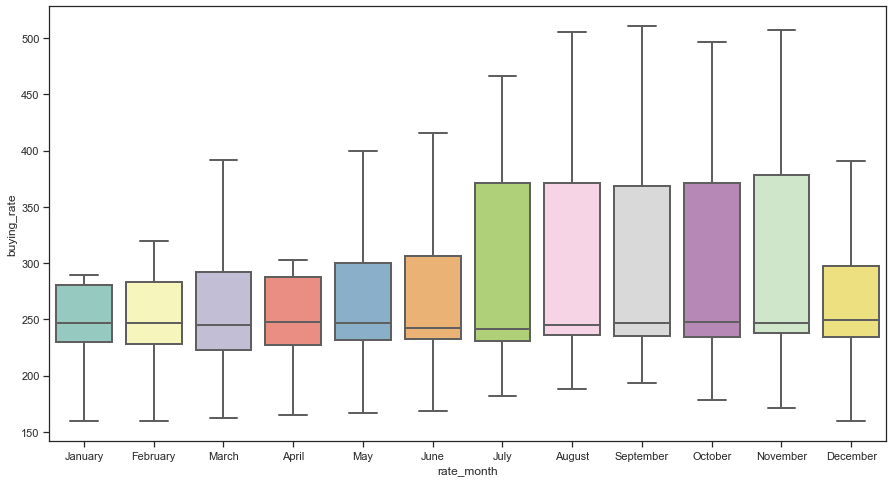

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(data=df, x="rate_month", y="buying_rate", 
                 showfliers=False,
                 order=["January", "February", "March", "April", "May", "June", 
                            "July", "August", "September", "October", "November", "December"], 
                 palette="Set3",
                linewidth=2.0)

In [63]:
#January and April tend to have relatively lower variations compared to the other months

# Let's see the dataframe again

In [64]:
df

,rate_date,currency,rate_year,rate_month,buying_rate
1172,2020-12-31,POUNDS STERLING,2020,December,517.3350
1184,2020-12-30,POUNDS STERLING,2020,December,515.8948
1196,2020-12-29,POUNDS STERLING,2020,December,511.8395
1208,2020-12-24,POUNDS STERLING,2020,December,514.9852
1220,2020-12-23,POUNDS STERLING,2020,December,508.5422
...,...,...,...,...,...
46429,2001-12-14,POUNDS STERLING,2001,December,162.5786
46440,2001-12-13,POUNDS STERLING,2001,December,161.7015
46441,2001-12-12,POUNDS STERLING,2001,December,161.1759
46452,2001-12-11,POUNDS STERLING,2001,December,160.1580


# Let's sort it from 2001 to 2020

In [65]:
df.sort_values(by="rate_date", ascending=True, inplace=True)

In [66]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate
46453,2001-12-10,POUNDS STERLING,2001,December,160.0238
46452,2001-12-11,POUNDS STERLING,2001,December,160.1580
46441,2001-12-12,POUNDS STERLING,2001,December,161.1759
46440,2001-12-13,POUNDS STERLING,2001,December,161.7015
46429,2001-12-14,POUNDS STERLING,2001,December,162.5786


# Let's save the new dataset into a csv file for subsequent analysis

In [67]:
df.to_csv("cleaned_data_GBP_to_NGN_2001-2020.csv", index=False, index_label=False)

The data is cleaned and set for predictions using machine learning models